<h2>Анализ данных популярного сервиса аренды самокатов GoFast<a class="tocSkip"><.h2>

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти. Основными задачами являются: Предварительный анализ, предобработка, исследование, оптимизация данных, а также приведение их к виду удобному для проверки гипотез. В результате работы планируется сделать выводы, которые помогут улучшить бизнес процессы и сделать их более эффективными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

#### Загрузка данных

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv')
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
display(users_data.head())
display(rides_data.head())
subscriptions_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Были созданы три датафрейма с нужными для анализа данными. Каждый из датафреймов изучен при помощи выведения первых пяти строк. Первый датафрейм содержит данные о пользователях, а именно ID(int), имя(str), возраст(int), город(str) и тип подписки(str).Второй информацию о поездках - дистанцию(float), продолжительность(float) и дату заезда(datetime). Третий всю информацию о подписке(int), а также различия бесплатного катания и катания с подпиской.

#### Предобработка данных

In [3]:
#Создадим столбец с номером месяца в дате
rides_data['date'] = pd.to_datetime(rides_data['date'])
rides_data['month_date'] = rides_data['date'].dt.month
#Мы округляем значения до ближайшего сверху целого числа для дальнейшей более удобной работы с этими значениями
rides_data['duration'] = np.ceil(rides_data['duration'])
#Изменим тип данных на int потому что все числа после преобразований являются целыми
rides_data['duration'] = rides_data['duration'].astype('int')
print(rides_data.head())

   user_id     distance  duration       date  month_date
0        1  4409.919140        26 2021-01-01           1
1        1  2617.592153        16 2021-01-18           1
2        1   754.159807         7 2021-04-20           4
3        1  2694.783254        19 2021-08-11           8
4        1  4028.687306        27 2021-08-28           8


In [4]:
#Проверим датафреймы на предмет дубликатов
users_data.duplicated().sum()

31

In [5]:
#Удалим явные дубликаты
users_data = users_data.drop_duplicates()
users_data = users_data.reset_index(drop=True)
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
users_data.duplicated().sum()

0

In [7]:
rides_data.duplicated().sum()

0

В результате предобработки был создан новый столбец с месяцами заказа. Также были изучены все столбцы датафреймов были обнаружены и удалены дубликаты в первом датафрейме, аномальных значений замечено не было. В столбце с длительностью заездов значения были округлены для ближайших сверху целых чисел для более удобной работы в дальнейшем.

#### Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


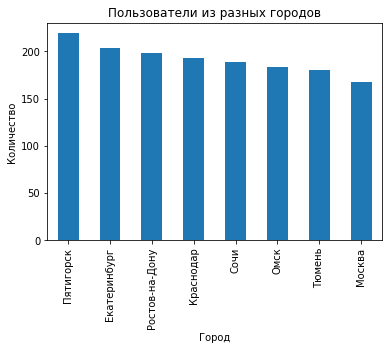

In [8]:
#Выведем частоту встречаемости городов
city_count_table = users_data.city.value_counts()
print(city_count_table)
plot0 = city_count_table.plot(kind='bar', title='Пользователи из разных городов')
plt.xlabel("Город")
plt.ylabel("Количество")
print(plot0)

Видно, что самый распространенный город - это Пятигорск, а самый не распространенный - Москва. Это странно, учитывая размер городов, но возможно компания только начинает пробовать себя на крупном рынке. 

free     835
ultra    699
Name: subscription_type, dtype: int64


<AxesSubplot:title={'center':'Пользователи с разными типами подписки'}, ylabel='subscription_type'>

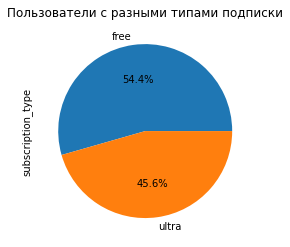

In [9]:
subs_count_table = users_data.subscription_type.value_counts()
print(subs_count_table)
subs_count_table.plot(kind='pie', title='Пользователи с разными типами подписки', autopct='%1.1f%%')

Мы видим, что пользователей с подпиской и без подписки практически равное количество, но пользователей без подписки больше. Разница между ними составляет всего 8% от общего количества пользователей.

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64
count     29.000000
mean      52.896552
std       48.824280
min        1.000000
25%        9.000000
50%       41.000000
75%       93.000000
max      145.000000
Name: age, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


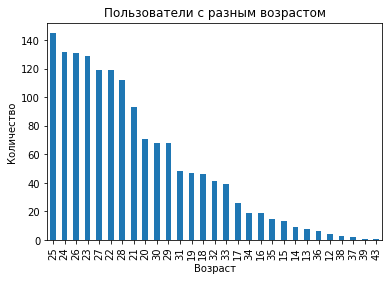

In [10]:
age_count_table = users_data.age.value_counts()
print(age_count_table)
print(age_count_table.describe())
plot1 = age_count_table.plot(kind = 'bar', title='Пользователи с разным возрастом')
plt.xlabel("Возраст")
plt.ylabel("Количество")
print(plot1)

Исходя из полученных данных самым частым возрастом пользователей является - 25 лет, а самыми редкими 37, 39, 43.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


<AxesSubplot:title={'center':'Дистанция заездов'}, xlabel='Дистанция', ylabel='Количество'>

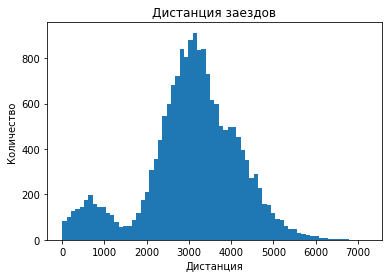

In [11]:
print(rides_data['distance'].describe())
plot2 = rides_data['distance'].plot(kind='hist',bins = 70, title='Дистанция заездов')
plt.xlabel("Дистанция")
plt.ylabel("Количество")
plot2

По гистограмме видно, что распределение преодоленного расстояния близко к нормальному с центральным значением 3070 метров.

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64


<AxesSubplot:title={'center':'Длительность заездов'}, xlabel='Длительность', ylabel='Количество'>

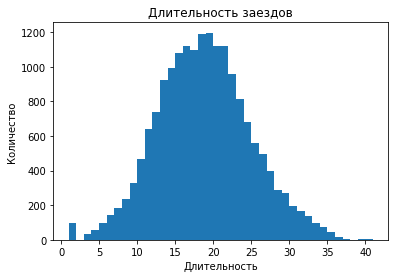

In [12]:
print(rides_data['duration'].describe())
plot3 = rides_data['duration'].plot(kind='hist',bins = 40, title='Длительность заездов')
plt.xlabel("Длительность")
plt.ylabel("Количество")
plot3

Распределение времени поездки также является номальным с центральным значением 17.8 минут.

**Вывод**:

Проведя исследователький анализ данных можно сделать вывод, что самым часто встречающимся городом является Пятигорск, а самым редким - Москва. Пользователей с подпиской и без подписки практически равное количество, но пользователей без подписки больше. Самый распространенный возраст пользователей - 25 лет, а самые непопулярные 37, 39 и 43. Распределение преодоленного расстояния близко к нормальному с центральным значением 3070 метров. Распределение времени поездки также является номальным с центральным значением 17.8 минут.

#### Объединение данных

In [13]:
#Объединим все датафреймы в один общий
general_data = users_data.merge(rides_data)
general_data = general_data.merge(subscriptions_data)
general_data.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16,2021-11-22,11,6,0,199


In [14]:
print(general_data.info())
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame

Исходя из данных полученных при помощи метода info можно сделать вывод, что в новом датафрейме нет пропусков, а количество записей совпадает со второй исходной таблицей, что может свидетельствовать о том, что объединение прошло корректно

In [15]:
users_without_subs = pd.DataFrame()
users_without_subs = general_data.loc[general_data['subscription_type'] == 'free']
users_without_subs.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,23,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,19,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,16,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,17,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,12,2021-06-23,6,8,50,0


In [16]:
users_with_subs = pd.DataFrame()
users_with_subs = general_data.loc[general_data['subscription_type'] == 'ultra']
users_with_subs.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16,2021-11-22,11,6,0,199


Text(0, 0.5, 'Количество')

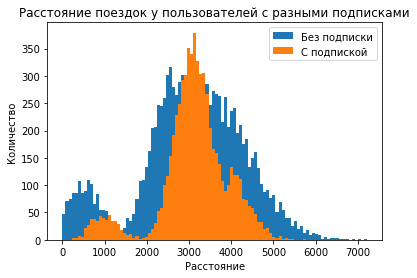

In [17]:
_, bins, _ = plt.hist(users_without_subs['distance'], bins=100)
_ = plt.hist(users_with_subs['distance'], bins=bins)
plt.title('Расстояние поездок у пользователей с разными подписками')
plt.xlabel("Расстояние")
plt.legend(['Без подписки', 'С подпиской'])
plt.ylabel("Количество")

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


Text(0, 0.5, 'Количество')

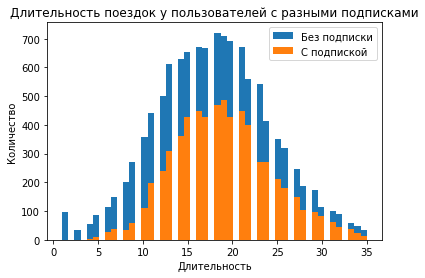

In [18]:
print(users_without_subs['duration'].describe())
_, bins, _ = plt.hist(users_without_subs['duration'], bins=50)
_ = plt.hist(users_with_subs['duration'], bins=bins)
plt.title('Длительность поездок у пользователей с разными подписками')
plt.xlabel("Длительность")
plt.legend(['Без подписки', 'С подпиской'])
plt.ylabel("Количество")

В этом разделе мы объединили все датафреймы в один общий, что поможет нам сделать более комплексные выводы. Также из общего датафрейма были выделены еще два с пользователями с и без подписки. По данным из этих двух датафреймов были построены гистограммы отражающие отличия в длительности и расстоянии заездов пользователей обеих категорий.

Главный вывод, который можно сделать из полученных гистограмм это то, что пользователи с подпиской очень редко ездят на дистанции меньше 2500 метров. Это может быть связано с тем, что люди, у которых есть подписка, постоянно пользуются самокатами и у них уже есть намеченный маршрут по которому они едут, а пользователи без подписки могут взять самокат просто прокатиться или попробовать, что это вообще такое.

Время поездки у пользователей с подпиской и без отличается слабо. И там и там значения распределены нормально и имеют примерно одинаковые центральные значения.

#### Подсчёт выручки

In [19]:
dist_agg_table = general_data.groupby(by=["user_id", 'month_date'],).agg({'distance': ['sum'],
                                                                        'duration': ['sum']}).reset_index()
dist_agg_table1 = general_data.groupby(by=["user_id", 'month_date'],).agg({'distance': ['count']}).reset_index()
dist_agg_table.merge(dist_agg_table1)
dist_agg_table1.columns = ['user_id', 'month_date', 'num_of_trips']
dist_agg_table['num_of_trips'] = dist_agg_table1['num_of_trips']
dist_agg_table.columns = ['user_id', 'month_date', 'distance_sum', 'duration_sum', 'num_of_trips']
display(dist_agg_table.head(15))
dist_agg_table.info()

,user_id,month_date,distance_sum,duration_sum,num_of_trips
0,1,1,7027.511294,42,2
1,1,4,754.159807,7,1
2,1,8,6723.470560,46,2
3,1,10,5809.911100,32,2
4,1,11,7003.499363,56,3
5,1,12,6751.629942,28,2
6,2,3,10187.723006,63,3
7,2,4,6164.381824,40,2
8,2,6,3255.338202,14,1
9,2,7,6780.722964,48,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       11331 non-null  int64  
 1   month_date    11331 non-null  int64  
 2   distance_sum  11331 non-null  float64
 3   duration_sum  11331 non-null  int64  
 4   num_of_trips  11331 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 442.7 KB


Создана таблица с суммой дистанций, длительностей поездок пользователей, а также с их количеством. В результате сравнения данных в этой таблице и исходной,а также оценки наличия пропусков я сделал вывод, что эта таблица - корректна. 

In [20]:
dist_agg_table1 = dist_agg_table.merge(users_data)
dist_agg_table1 = dist_agg_table1.merge(subscriptions_data)
dist_agg_table1.head(15)

,user_id,month_date,distance_sum,duration_sum,num_of_trips,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42,2,Кира,22,Тюмень,ultra,6,0,199
1,1,4,754.159807,7,1,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6723.470560,46,2,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5809.911100,32,2,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7003.499363,56,3,Кира,22,Тюмень,ultra,6,0,199
5,1,12,6751.629942,28,2,Кира,22,Тюмень,ultra,6,0,199
6,2,3,10187.723006,63,3,Станислав,31,Омск,ultra,6,0,199
7,2,4,6164.381824,40,2,Станислав,31,Омск,ultra,6,0,199
8,2,6,3255.338202,14,1,Станислав,31,Омск,ultra,6,0,199
9,2,7,6780.722964,48,2,Станислав,31,Омск,ultra,6,0,199


Добавил в новую таблицу данные о наличии подписки и стоимости поезки.

In [21]:
for i in range(len(dist_agg_table1)):
    dist_agg_table1.loc[i, 'month_profit'] = dist_agg_table1.loc[i, 'subscription_fee'] + (dist_agg_table1.loc[i, 'minute_price'] * dist_agg_table1.loc[i, 'duration_sum']) + (dist_agg_table1.loc[i, 'start_ride_price'] * dist_agg_table1.loc[i, 'num_of_trips'])
dist_agg_table1.head(15)

,user_id,month_date,distance_sum,duration_sum,num_of_trips,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,month_profit
0,1,1,7027.511294,42,2,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,4,754.159807,7,1,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,8,6723.470560,46,2,Кира,22,Тюмень,ultra,6,0,199,475.0
3,1,10,5809.911100,32,2,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,11,7003.499363,56,3,Кира,22,Тюмень,ultra,6,0,199,535.0
5,1,12,6751.629942,28,2,Кира,22,Тюмень,ultra,6,0,199,367.0
6,2,3,10187.723006,63,3,Станислав,31,Омск,ultra,6,0,199,577.0
7,2,4,6164.381824,40,2,Станислав,31,Омск,ultra,6,0,199,439.0
8,2,6,3255.338202,14,1,Станислав,31,Омск,ultra,6,0,199,283.0
9,2,7,6780.722964,48,2,Станислав,31,Омск,ultra,6,0,199,487.0


Была создана таблица с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц. Также был добавлен столбец с помесячной прибылью от каждого пользователя.

#### Проверка гипотез

**1) Нулевая гипотеза:** пользователи с подпиской и без тратят одинаковое время на поезки

**Альтернативная гипотеза:** пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [22]:
results = st.ttest_ind(users_with_subs['duration'], users_without_subs['duration'], alternative='greater')
print(f'p-value: {results.pvalue}')
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу, а значит есть основания считать, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

**2) Нулевая гипотеза:** Среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров.

**Альтернативная гипотеза:** Среднее расстояние, которое проезжают пользователи с подпиской, превышает 3130 метров.

Для тестирования гипотезы возьмем выборку из 400 элементов.

In [23]:
interested_distance = 3130
alpha = 0.05
results = st.ttest_1samp(
    users_with_subs['distance'], 
    interested_distance,
      alternative='greater')

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Мы не отвергаем нулевую гипотезу, а значит не отвергаем тот факт, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров. А значит расстояние, которое проезжают пользователи с подпиской меньше изнашивает самокаты, а значит выгодны для бизнеса.

**3) Нулевая гипотеза:** помесячная выручка от пользователей с подпиской и без подписки равна.

**Альтернативная гипотеза:** помесячная выручка от пользователей с подпиской по месяцам выше.

Для тестирования гипотезы возьмем две выборки по 400 элементов.

In [24]:
results = st.ttest_ind(dist_agg_table1.loc[dist_agg_table1['subscription_type'] == 'ultra']['month_profit'],
                       dist_agg_table1.loc[dist_agg_table1['subscription_type'] == 'free']['month_profit'], alternative='greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу, а значит есть основания полагать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Это логично, ведь если бы было наоборот, компания упразднила бы данную концепцию. 

**4)** Это гипотеза о равенстве средних для зависимых выборок. Для проверки этой гипотезы нам потребовался бы метод ttest_rel. В таком случае гипотеза формулировалась бы так:

Нулевая гипотеза: средние значения до и после изменения равны.

Альтернативная гипотеза: средние значения после изменения стали значимо меньше.

#### Общий вывод

Нам были переданы данные популярного сервиса аренды самокатов GoFast, а именно три датасета содержащие данные о пользователях, поездках и различных тарифах. 

**На этапе предобработки** датасеты были исследованы на предмет аномальных значений, были удалены дубликаты в первом датафрейме, а также был добавлен столбец, несущий информацию о месяце поездки.

<br>

**На этапе исследовательского анализа данных** был проведен анализ имеющихся датасетов. В результате, мы выяснили, что:

1) Самый распространенный город - это Пятигорск, а самый не распространенный - Москва.

2) Пользователей с подпиской и без подписки практически равное количество, но пользователей без подписки больше. Разница между ними составляет всего 8% от общего количества пользователей.

3) Самым частым возрастом пользователей является - 25 лет, а самыми редкими 37, 39, 43

4) Распределение преодоленного расстояния близко к нормальному с центральным значением 3070 метров.

5) Распределение времени поездки также является номальным с центральным значением 17.8 минут.

<br>

**На этапе объединения данных** были проведены следующие операции:

1) Три датафрейма были объединены в один, содержащий общую информацию о пользователях и их поездках.

2) Этот датафрейм был разбит на два по принципу (С подпиской), (Без подписки)

3) Были исследованы зависимости различных показателей от наличия подписки. Мы выяснили, что главным отличием является факт, что пользователи с подпиской не ездят на маленькие дистанции, а пользователи без подписки ездят.

<br>

**На этапе подсчета выручки** Была создана сводная таблица с общей дистанцией и временем пользователей, а также с количеством поездок каждого. После, была подсчитана и добавлена в таблицу помесячная прибыль от каждого пользователя. 

<br>

**На последнем этапе были протестированы следующие гипотезы:**

1) Тратят ли пользователи с подпиской больше времени на поездки? Есть основания считать, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130? Мы не отвергаем тот факт, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров. А значит расстояние, которое проезжают пользователи с подпиской меньше изнашивает самокаты, а значит выгодны для бизнеса.

3) Является ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Есть основания полагать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Это логично, ведь если бы было наоборот, компания упразднила бы данную концепцию.

4) А также приведен алгоритм тестирования гипотезы об уменьшении количества обращений в тех. поддержку из-за обновления сервера.

В конечном итоге, на основании протестированных гипотез, можно резюмировать, что пользователи с подпиской являются **более выгодными для бизнеса**, потому что в среднем тратят больше времени на поездки, при этом критично не изначшивая самокаты. Также помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. 